In [32]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
# Loading the dataset
df = pd.read_csv('./dataset/diabetes.csv')

In [3]:
# Checking first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking last 5 rows of the dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Dataset Descriptions
1. **Pregnancies**  
   - Number of pregnancies a patient has had.  
2. **Glucose**  
   - Plasma glucose concentration.  
3. **BloodPressure**  
   - Diastolic blood pressure (mm Hg).  
4. **SkinThickness**  
   - Triceps skinfold thickness (mm).  
5. **Insulin**  
   - 2-hour serum insulin (mu U/ml).  
6. **BMI**  
   - Body mass index (weight in kg/(height in m)^2).  
7. **DiabetesPedigreeFunction**  
   - Likelihood of diabetes based on family history.  
8. **Age**  
   - Age of the individual (years).  
9. **Outcome**  
   - Diabetes diagnosis:  
     - **0:** Non-diabetic.  
     - **1:** Diabetic.  

In [5]:
df.shape

(768, 9)

## Exploratory Data Analysis

**Getting Detailed Info Regarding Dataset Fields**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Checking For Null & Duplicate Values**

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

**Getting Statistical Summary Of Numerical Columns Of Dataset**

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observation**
- 34.89% of the individuals are diabetic while 64.11% of individuals are non-diabetic.
- Columns like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI` have minimum value of `0` which is unrealistic.

**Exploring Target Variable (Outcome)**

In [10]:
df.loc[:, 'Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

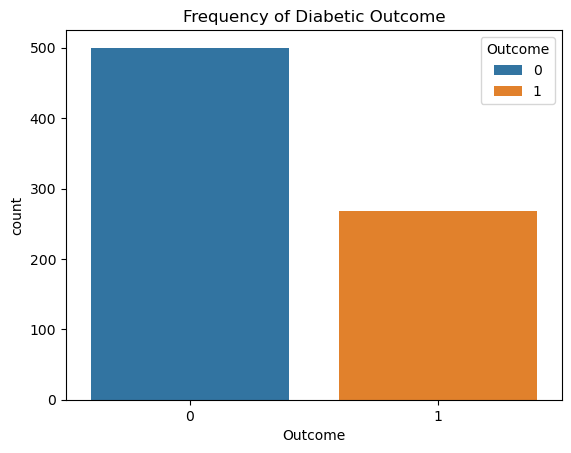

In [11]:
sns.countplot(data=df, x='Outcome', hue='Outcome')
plt.title('Frequency of Diabetic Outcome')
plt.show()

**Getting Insight On The Correlation Between Features**

In [12]:
corr_matrix = df.corr()
print(corr_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

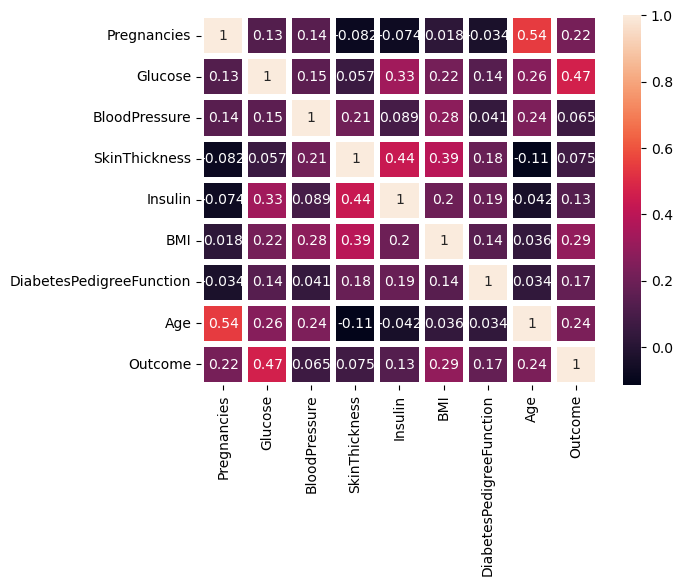

In [13]:
sns.heatmap(corr_matrix, annot=True, linewidth=4)
plt.show()

**Correlation with target variable**

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64


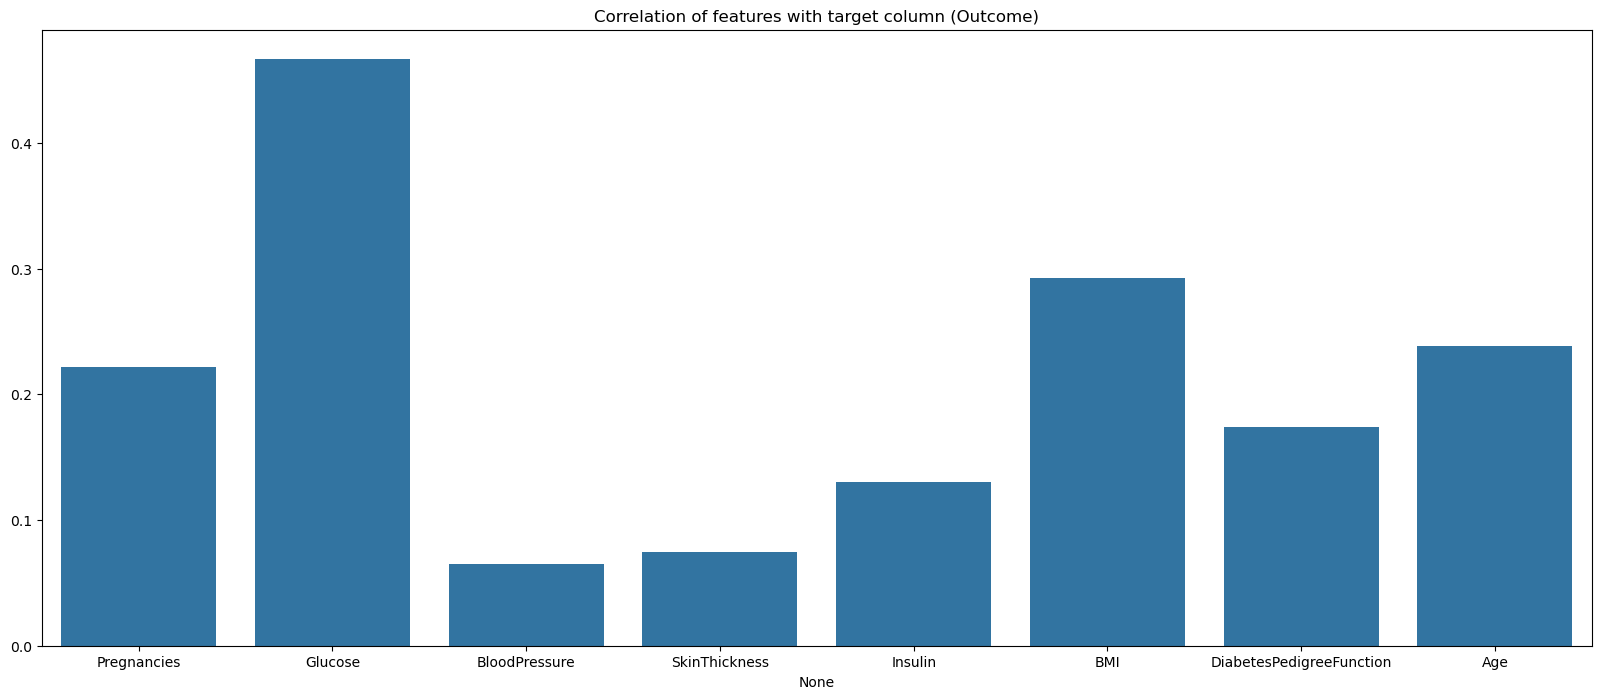

In [14]:
corr_with_target = (df.corr()['Outcome']).drop('Outcome')
print(corr_with_target)
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.title('Correlation of features with target column (Outcome)')
plt.show()

**Understandings**
- `Glucose` is by far the most strongly correlated feature with the target, suggesting it plays a significant role in diabetic condition.
- `BMI` & `Age` also have moderate positive correlation with target, making them important features for prediction.
- `Pregnancies` & `DiabetesPedigreeFunction` are weakly correlate but still suggest some association with diabetes.
- `BloodPressure`, `SkinThickness` & `Insulin` show very less correlation suggesting they may not be useful for prediction.

**Looking at distribution of features**

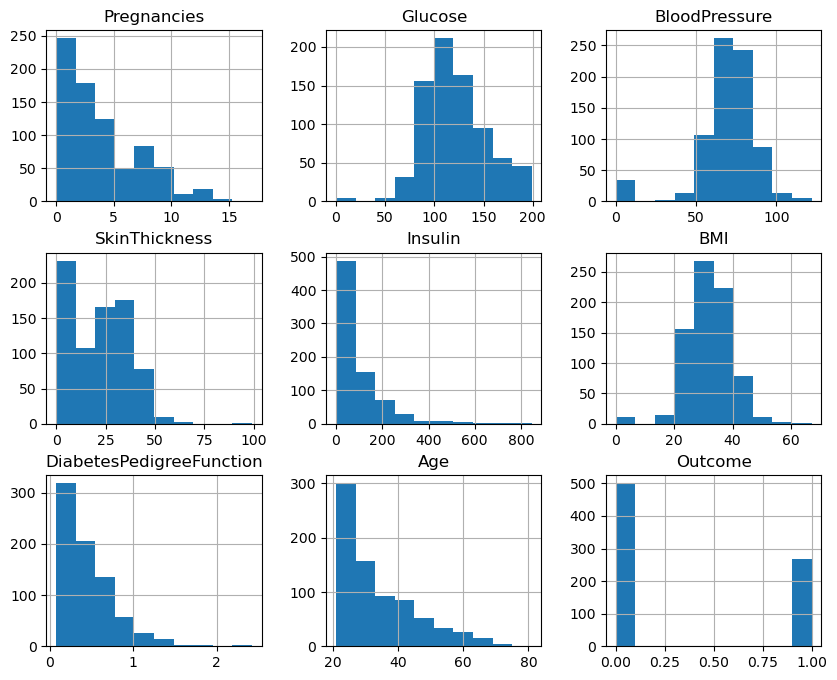

In [15]:
df.hist(figsize=(10, 8))
plt.show()

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Cleaning
We saw some of the unrealistic values like `0` on `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` & `BMI`
I think KNN Imputer will be a good choice here because we could see some correlation with each other of these various feature columns

**Imputation with KNN Imputer**

In [17]:
# Checking for number of zeroes
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
impute_target_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[impute_target_columns] = df[impute_target_columns].replace(0, np.nan)
knn_imputer = KNNImputer(n_neighbors=5)
df[impute_target_columns] = knn_imputer.fit_transform(df[impute_target_columns])

In [19]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

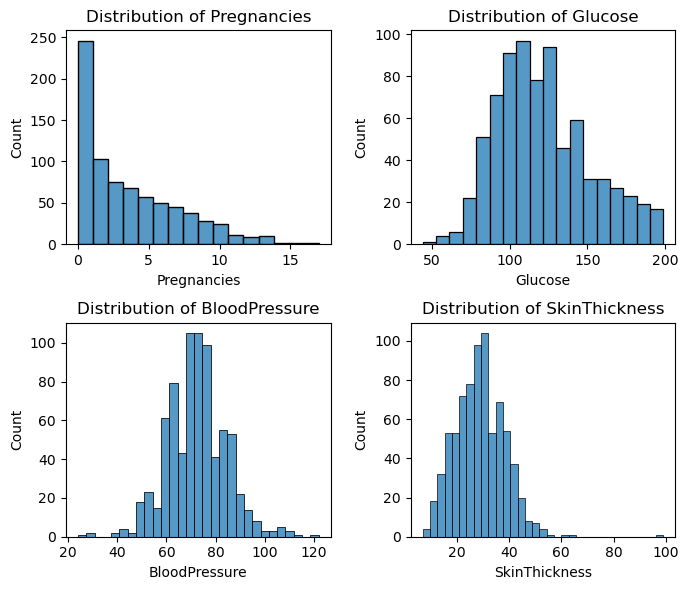

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(7, 6))

sns.histplot(df, x='Pregnancies', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Pregnancies')

sns.histplot(df, x='Glucose', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Glucose')

sns.histplot(df, x='BloodPressure', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of BloodPressure')

sns.histplot(df, x='SkinThickness', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of SkinThickness')

plt.tight_layout()
plt.show()

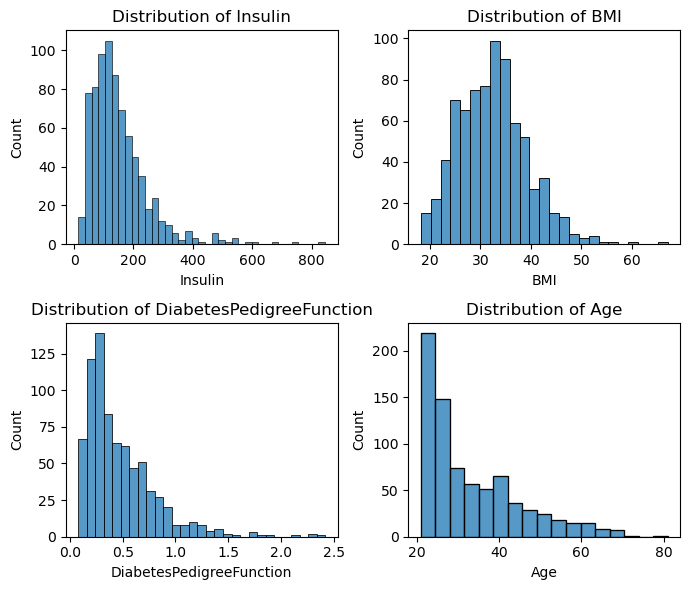

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(7, 6))

sns.histplot(df, x='Insulin', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Insulin')

sns.histplot(df, x='BMI', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of BMI')

sns.histplot(df, x='DiabetesPedigreeFunction', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of DiabetesPedigreeFunction')

sns.histplot(df, x='Age', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

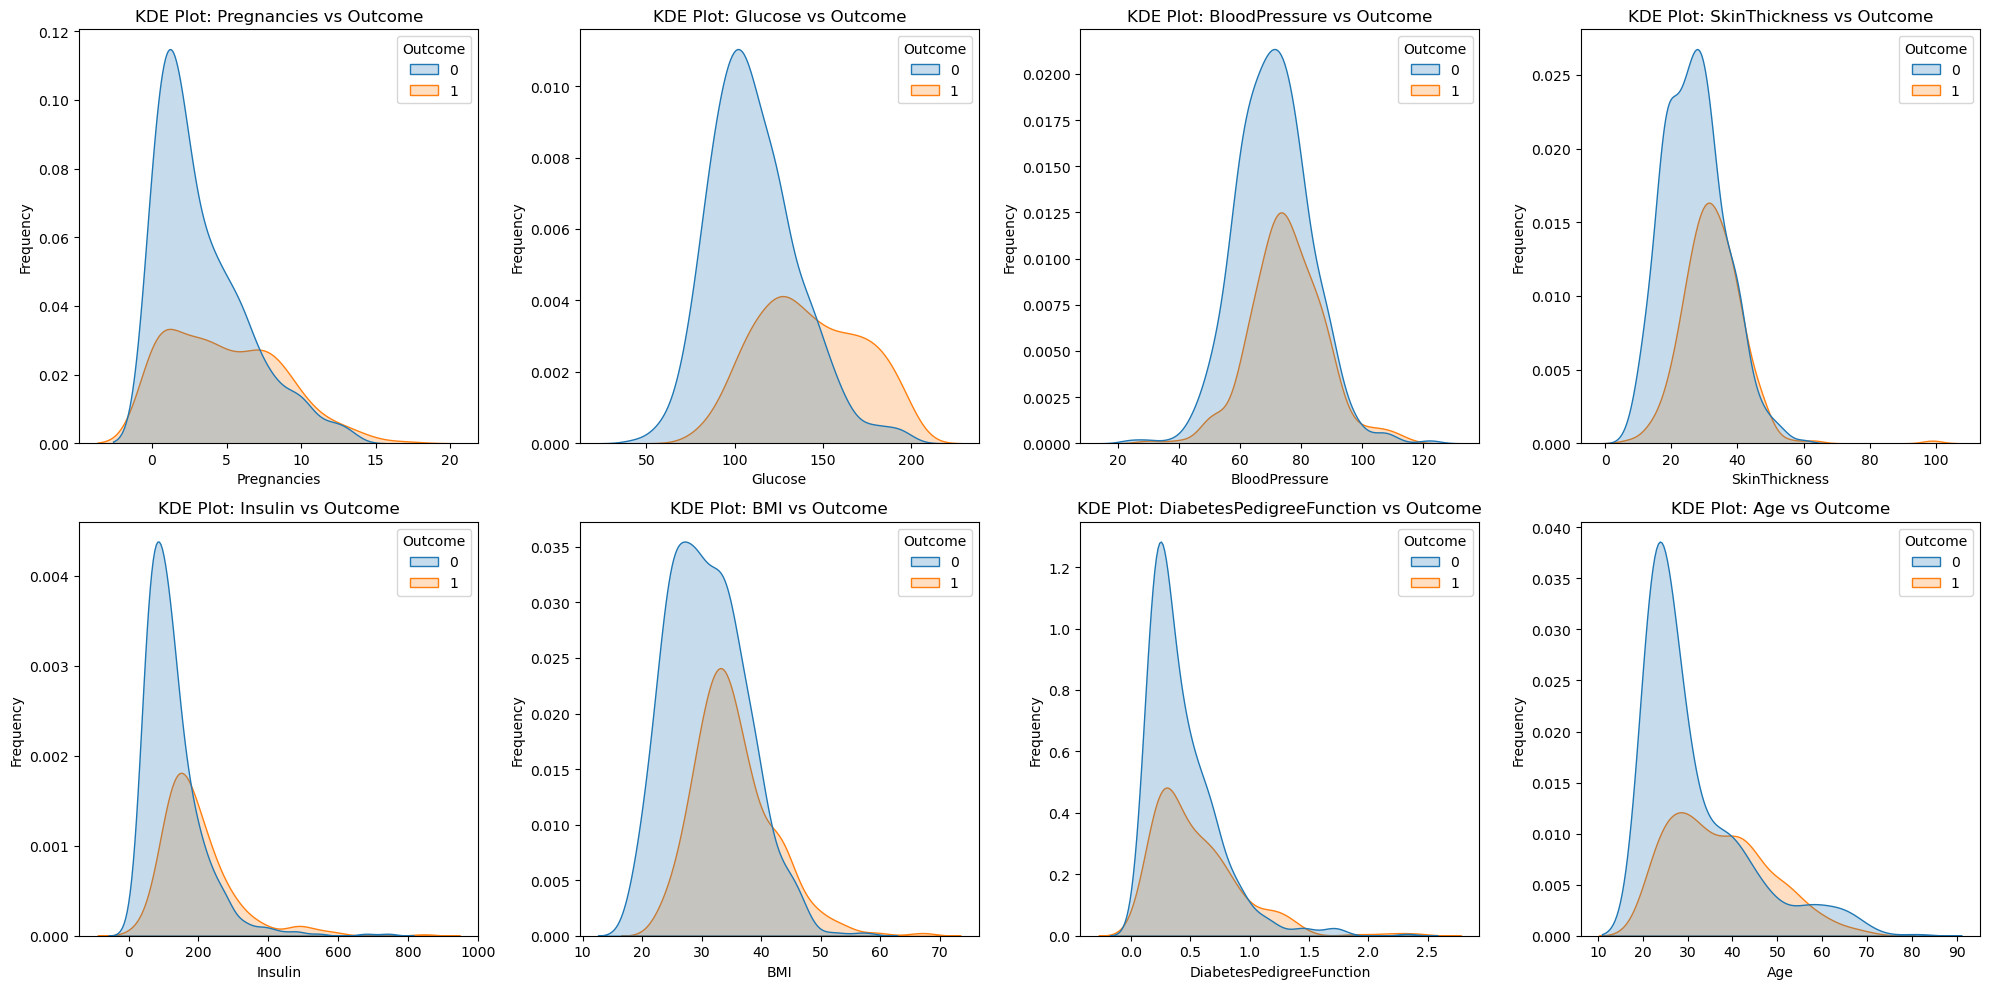

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.kdeplot(data=df, x=feature, hue='Outcome', fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'KDE Plot: {feature} vs Outcome')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## Model Training

In [39]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [40]:
X = df[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.fit_transform(X_test)

In [43]:
classifiers = {
    "Logistic Regression (Linear)": LogisticRegression(),
    "Random Forest (Ensemble)": RandomForestClassifier(),
    "KNN (Neighbor-based)": KNeighborsClassifier(),
    "Naive Bayes (Probabilistic)": GaussianNB(),
    "SVM (Support Vector)": SVC(probability=True),
    "XGBoost (Boosting)": XGBClassifier()
}

In [44]:
results = {}

In [45]:
for name, model in classifiers.items():
    model.fit(X_trainScaled, y_train)
    cv_scores = cross_val_score(model, X_trainScaled, y_train, cv=5)
    mean_cv_score = cv_scores.mean()
    y_pred = model.predict(X_testScaled)

    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_testScaled)[:, 1])
    classification_rep = classification_report(y_test, y_pred)

    results[name] = {
    'Accuracy': accuracy,
    'AUC': auc,
    'Mean CV Score': mean_cv_score,
    'Classification Report': classification_rep
}

In [46]:
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"AUC: {metrics['AUC']:.4f}")
    print(f"Mean CV Score: {metrics['Mean CV Score']:.4f}")
    print(f"Classification Report:\n{metrics['Classification Report']}")
    print("-" * 50)

Model: Logistic Regression (Linear)
Accuracy: 0.7792
AUC: 0.8283
Mean CV Score: 0.7753
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

--------------------------------------------------
Model: Random Forest (Ensemble)
Accuracy: 0.7922
AUC: 0.8422
Mean CV Score: 0.7606
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        99
           1       0.71      0.71      0.71        55

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154

--------------------------------------------------
Model: KNN (Neighbor-based)


**Observation**
- Accuracy: Random Forest has the highest accuracy (79.22%).
- AUC: Random Forest also has the highest AUC (0.8422), indicating it performs the best in distinguishing between diabetic and non-diabetic cases.
- Mean CV Score: The Logistic Regression model has the highest mean CV score (0.7753), which shows stable performance across different folds.
- Random Forest has the highest F1-score for class 1 (diabetic) (0.71), and a decent F1-score for class 0 (non-diabetic) (0.84).
- Naive Bayes also has good recall for class 1 (diabetic) (0.65) and performs similarly to Random Forest.

## Exporting the trained model

In [47]:
import joblib
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']